# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [7]:
# Write your code here
import pandas as pd

# Function to load data into a DataFrame
def load_data_file(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.strip().split(' ', 1)
            data.append((int(label), text))
    return pd.DataFrame(data, columns=['label', 'text'])

# Load training and testing data
train_data = load_data_file('sample_data/stsa-train.txt')
test_data = load_data_file('sample_data/stsa-test.txt')

# Preview loaded data
train_data.head(), test_data.head()


# Splitting the train data into training and validation sets (80% training, 20% validation)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=40)

# Using TF-IDF to convert the text to features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_valid = tfidf_vectorizer.transform(valid_data['text'])
X_test = tfidf_vectorizer.transform(test_data['text'])
y_train = train_data['label'].astype(int)
y_valid = valid_data['label'].astype(int)
y_test = test_data['label'].astype(int)

X_train.shape, X_valid.shape, X_test.shape

((5536, 5000), (1384, 5000), (1821, 5000))

In [9]:
!pip install gensim

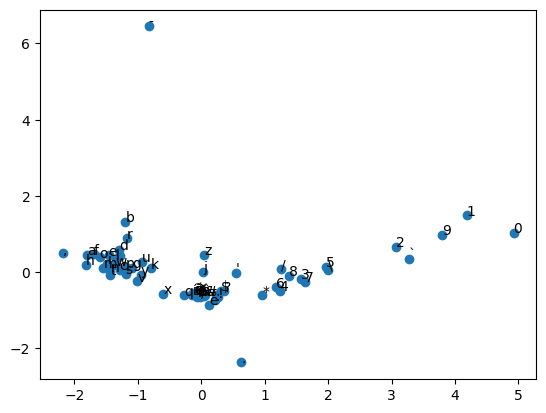

In [11]:
#import required libraries
import gensim
from gensim.models import Word2Vec
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

#import dataset
#using data downloaded in first question

# Preprocessing the text and tokenizing
def preprocess_text(text):
    return gensim.utils.simple_preprocess(text)

t1=load_data_file('sample_data/stsa-train.txt')
sentences = t1['text'].tolist()

#Traing 300 dimension word2vec model and saving it
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

#visualizing word embedding model
# Retrieve all vectors from the trained model
X = model.wv[model.wv.index_to_key]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot the result of PCA
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

# Annotate the points on the graph with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [13]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 10-fold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    # Training the model on full training data
    model.fit(X_train, y_train)
    # Predicting the validation data
    y_pred = model.predict(X_valid)
    # Evaluation metrics
    accuracy = accuracy_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred, pos_label=1)
    precision = precision_score(y_valid, y_pred, pos_label=1)
    f1 = f1_score(y_valid, y_pred, pos_label=1)
    return cv_scores.mean(), accuracy, recall, precision, f1

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():
    cv_accuracy, accuracy, recall, precision, f1 = evaluate_model(model, X_train, y_train, X_valid, y_valid)
    results[name] = {
        'CV Accuracy': cv_accuracy,
        'Validation Accuracy': accuracy,
        'Recall': "recall",
        'Precision': precision,
        'F1 Score': f1
    }

results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

               CV Accuracy  Validation Accuracy  Recall  Precision  F1 Score
MultinomialNB     0.787754             0.784682  recall   0.788966  0.793343
SVM               0.778903             0.778179  recall   0.785515  0.786063
KNN               0.509561             0.502890  recall   0.871795  0.089947
Decision Tree     0.612183             0.617052  recall   0.625841  0.636986
Random Forest     0.712067             0.700867  recall   0.703356  0.716826
XGBoost           0.701412             0.695809  recall   0.685930  0.721745


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [14]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
The questions given in this assignments are usefull to recall most of the important topics I have learned in the class.

I didn't faced any challenges in this assignment
'''

'\nThe questions given in this assignments are usefull to recall most of the important topics I have learned in the class.\n'